The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [2]:
import warnings 
warnings.simplefilter(action='ignore',category = FutureWarning)

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
# Importing Data set from Github
dataset="https://raw.githubusercontent.com/aswathyc2002/MACHINE-LEARNING-PROJECTS/refs/heads/main/Employee.csv"

In [8]:
df = pd.read_csv(dataset)

Data Exploration

*Explore the data, list down the unique values in each feature and find its length.
*Perform the statistical analysis and renaming of the columns.

In [12]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [14]:
df.shape

(148, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [18]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [20]:
# unique value and length in each column

In [22]:
unique = df.nunique()
unique

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [24]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [26]:
df['Country'].unique()

array(['India'], dtype=object)

In [28]:
df['Gender'].unique()

array([0, 1], dtype=int64)

Observation:
'TCS' and 'Tata Consultancy Services' , 'CTS' and 'Congnizant', 'Infosys' and 'Infosys Pvt Lmt' are same.
'Congnizant' is 'Cognizant'.
'podicherry' is 'pondicherry'
We have to treat them properly.
Rename the Column

In [31]:
# Renaming the Age and Salary columns
df.rename(columns={'Age': 'Employee Age', 'Salary': 'Employee Salary'}, inplace = True)

In [33]:
# Replacing the error values in data
df.replace({'Tata Consultancy Services': 'TCS'},inplace=True)
df.replace({'Infosys Pvt Lmt': 'Infosys'},inplace=True)
df.replace({'CTS': 'Cognizant'},inplace=True)
df.replace({'Congnizant': 'Cognizant'},inplace=True)
df.replace({'Tata Consultancy Services': 'TCS'},inplace=True)
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant', nan], dtype=object)

In [35]:
# Spelling correction in 'podicherry'
df.replace({'Podicherry': 'Pondicherry'},inplace=True)
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Pondicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [37]:
# statistical Analysis

In [39]:
df.describe()

,Employee Age,Employee Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [41]:
unique = df.nunique()
unique

Company             3
Employee Age       29
Employee Salary    40
Place              11
Country             1
Gender              2
dtype: int64

In [43]:
df.describe()

,Employee Age,Employee Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Minimum value for Employee Age is 17 & maximum value is 54. so there is no outliers and we can replace the null values using mean.

In [46]:
df['Employee Age'].fillna(df['Employee Age'].mean(),inplace=True)

In [48]:
missing_values = df.isna().sum()
missing_values


Company             8
Employee Age        0
Employee Salary    24
Place              14
Country             0
Gender              0
dtype: int64

In [50]:
# Treat Employees salary column with mean values
df['Employee Salary'].fillna(df['Employee Salary'].mean(),inplace=True) 

In [52]:
# Treat the Place column with mode
df['Place'].fillna(df['Place'].mode()[0],inplace=True)

In [54]:
missing_values = df.isna().sum()
missing_values

Company            8
Employee Age       0
Employee Salary    0
Place              0
Country            0
Gender             0
dtype: int64

Now the dataset is cleaned

In [57]:
df

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


Data Analysis
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

In [60]:
# Filter the data with age >40 and salary<5000
df[(df['Employee Age'] > 40) & (df['Employee Salary'] < 5000)]

,Company,Employee Age,Employee Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


In [62]:
# Plot the chart with age and salary

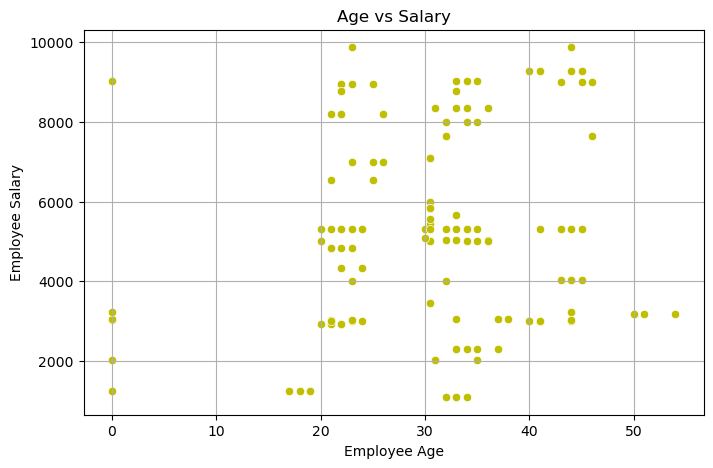

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Employee Age', y='Employee Salary', color = 'y')
plt.title("Age vs Salary")
plt.xlabel("Employee Age")
plt.ylabel("Employee Salary")
plt.grid(True)
plt.show()

scatter plot observation :
There is no correlation between Empployee Age & Employees Salary

In [71]:
# Counting  the number of people from each place and represent it visually

In [73]:
df['Place'].value_counts()

Place
Mumbai         51
Calcutta       33
Chennai        14
Delhi          14
Cochin         13
Noida           8
Hyderabad       8
Pondicherry     3
Pune            2
Bhopal          1
Nagpur          1
Name: count, dtype: int64

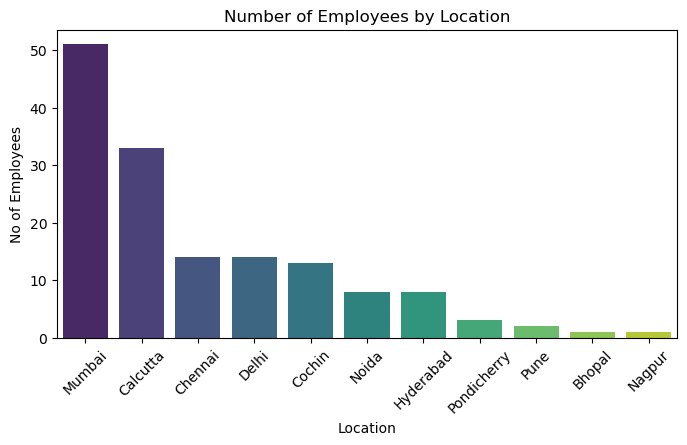

In [75]:
# Visualization using barplot
plt.figure(figsize=(8, 4))
x = df['Place'].value_counts().index
y = df['Place'].value_counts().values
sns.barplot(x=x, y=y, palette='viridis')
plt.title("Number of Employees by Location")
plt.xlabel("Location")
plt.ylabel("No of Employees")
plt.xticks(rotation=45)
plt.show()

Observation
Most of the employees are from mumbai
Least number of employees are from Nagpur
Data Encoding
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [78]:
# Categorical data encoding.

In [80]:
df.head()

,Company,Employee Age,Employee Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


In [82]:
df.describe()

,Employee Age,Employee Salary,Gender
count,148.000000,148.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,10.395076,2354.305003,0.417654
min,0.000000,1089.000000,0.000000
25%,23.000000,3149.250000,0.000000
50%,31.000000,5312.467742,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          140 non-null    object 
 1   Employee Age     148 non-null    float64
 2   Employee Salary  148 non-null    float64
 3   Place            148 non-null    object 
 4   Country          148 non-null    object 
 5   Gender           148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [86]:
# 'Company', 'place', 'Country' are Categorical Columns.
# only one Country in Country column so we can drop the column.

In [88]:
df.drop('Country', axis=1, inplace = True)

In [90]:
df

,Company,Employee Age,Employee Salary,Place,Gender
0,TCS,20.0,5312.467742,Chennai,0
1,Infosys,30.0,5312.467742,Mumbai,0
2,TCS,35.0,2300.000000,Calcutta,0
3,Infosys,40.0,3000.000000,Delhi,0
4,TCS,23.0,4000.000000,Mumbai,0
...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,1
144,Infosys,22.0,8787.000000,Calcutta,1
145,Infosys,44.0,4034.000000,Delhi,1
146,TCS,33.0,5034.000000,Mumbai,1


One Hot Encoding

In [93]:
# Encoding categorical datas using one-hot encoding.

In [95]:
df['Company'].unique()

array(['TCS', 'Infosys', 'Cognizant', nan], dtype=object)

In [97]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Pondicherry', 'Cochin',
       'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'], dtype=object)

In [99]:
# OneHotEncoding
df = pd.get_dummies(df,columns = ['Company', 'Place'], dtype=int)

In [101]:
df

,Employee Age,Employee Salary,Gender,Company_Cognizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune
0,20.0,5312.467742,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30.0,5312.467742,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
144,22.0,8787.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
145,44.0,4034.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,33.0,5034.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Feature Scaling
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [104]:
df

,Employee Age,Employee Salary,Gender,Company_Cognizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune
0,20.0,5312.467742,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30.0,5312.467742,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,33.0,9024.000000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
144,22.0,8787.000000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
145,44.0,4034.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,33.0,5034.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [106]:
# Standardscaler
sd_scalar = StandardScaler()
df[['Employee Age', 'Employee Salary']] = sd_scalar.fit_transform(df[['Employee Age','Employee Salary']])

In [108]:
df

,Employee Age,Employee Salary,Gender,Company_Cognizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune
0,-1.012038,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-0.046778,0.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.435852,-1.283902,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.918482,-0.985565,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.722460,-0.559369,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.242800,1.581841,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
144,-0.818986,1.480832,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
145,1.304587,-0.544878,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,0.242800,-0.118682,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [110]:
# MinMax Scalar
min_max_scalar = MinMaxScaler()
df[['Employee Age', 'Employee Salary']] = min_max_scalar.fit_transform(df[['Employee Age', 'Employee Salary']])

In [112]:
df

,Employee Age,Employee Salary,Gender,Company_Cognizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Pondicherry,Place_Pune
0,0.370370,0.480650,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0.555556,0.480650,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.648148,0.137817,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.740741,0.217480,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0.425926,0.331285,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.611111,0.903039,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
144,0.407407,0.876067,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
145,0.814815,0.335154,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,0.611111,0.448959,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
